In [1]:
import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen
from rdkit.Chem import rdMolDescriptors

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.decomposition import PCA 

In [2]:
def read_file_lines(file_path):
    lines = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                lines.append(line.strip())  # Strip removes leading/trailing whitespaces and newline characters
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except IOError:
        print(f"Error: Unable to read from file '{file_path}'.")
    return lines

def calculate_cycles(mol):
    # Get the smallest set of smallest rings (cycles)
    cycles = Chem.GetSymmSSSR(mol)
    num_cycles = len(cycles)
    return num_cycles

def calculate_ions(smiles):
    return smiles.count('.')

def calculate_logP(mol):
    return rdkit.Chem.Crippen.MolLogP(mol)

def calculate_morgan_fingerprint(mol):
    fp = rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Change the radius if needed
    return fp

def calculate_maccs_key(mol):
    maccs_key = rdkit.Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol)
    return maccs_key


#color = [(default), (#FFB6C1, crimson)]

def plot_distribution(df, target,save=""):
    # Step 3: Plot the molecular weight distribution using seaborn
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=target, kde=True, bins=30, color="#FFB6C1", line_kws={'color': 'crimson'})
    plt.xlabel("")
    plt.ylabel("")

    if(save != ""):
        plt.savefig(save)

    plt.show()


#color = [(default), 'r']

def plot_3D_pca(df, target,save=""):

    fps = list(df[target])
    pca = PCA(n_components=3)
    transformed_fps = pca.fit_transform(fps)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')  # Create a 3D axes
    ax.scatter(transformed_fps[:, 0], transformed_fps[:, 1], transformed_fps[:, 2], edgecolors="k",c='r')
    
    if(save != ""):
        plt.savefig(save)
    
    plt.show()


def plot_2D_pca(df, target,save=""):

    fps = list(df[target])
    pca = PCA(n_components=2)
    transformed_fps = pca.fit_transform(fps)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(transformed_fps[:, 0], transformed_fps[:, 1], edgecolors="k", c='r')

    if(save != ""):
        plt.savefig(save)
    
    plt.show()

def calculate_metrics(dataset):
    # Step 1: Calculate molecular weights using RDKit
    molecular_weights = []
    ring_counts = []
    ion_counts = []
    morgan_fps = []
    maccs_fps = []
    log_ps = []
    for smiles in dataset["SMILES"]:
        mol = Chem.MolFromSmiles(str(smiles) )
        if mol:
            molecular_weight = rdkit.Chem.Descriptors.ExactMolWt(mol)
            molecular_weights.append(molecular_weight)
            ring_counts.append(calculate_cycles(mol))
            ion_counts.append(calculate_ions(smiles))
            morgan_fps.append(calculate_morgan_fingerprint(mol))
            maccs_fps.append(calculate_maccs_key(mol))
            log_ps.append(calculate_logP(mol))
            
    df = pd.DataFrame({"Molecular Weight": molecular_weights,"LogP":log_ps,"Cycles":ring_counts, "Morgan":morgan_fps, "MACCS":maccs_fps,"Ions":ion_counts})
    return df

In [3]:
chembl = pd.read_csv("../data/chembl24.tsv",sep = '\t', names = ["WLN","CHEMBLID","SMILES"])
chemspider = pd.read_csv("../data/chemspider.tsv",sep = '\t', names = ["WLN","SMILES"])
pubchem = pd.read_csv("../data/pubchem.tsv",sep='\t',names=["WLN","SMILES"])
book = pd.read_csv("../data/smith.tsv",names=["WLN","SMILES"])

print(f"{len(chembl)} compounds in chembl")
print(f"{len(pubchem)} compounds in pubchem")
print(f"{len(chemspider)} compounds in chemspider")
print(f"{len(book)} compounds in encoding book")

print()
pre_total = len(chembl) + len(chemspider) + len(pubchem) + len(book)
print(f"{pre_total} total compounds")

2934 compounds in chembl
6589 compounds in pubchem
15934 compounds in chemspider
422 compounds in encoding book

25879 total compounds


In [4]:
pubchem['SMILES'].value_counts()

SMILES
CC(CC1=CC=CC=C1)N                                          4
C1C2C=CC1C3C2C4(C(=C(C3(C4(Cl)Cl)Cl)Cl)Cl)Cl               3
CCOP(=O)(OCC)OP(=O)(OCC)OCC                                3
CC(CC1=CC=CC=C1)N.OS(=O)(=O)O                              3
C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O                     3
                                                          ..
C[N+]1(CCC(C1)OC(=O)C(C2CCCC2)(C3=CC=CC=C3)O)C.[Br-]       1
CC1=CC2C(CCC3(C2CCC3(C(=O)C)OC(=O)C)C)C4(C1=CC(=O)CC4)C    1
CC([N+](=O)[O-])(Cl)Cl                                     1
CC(C)([N+](=O)[O-])Cl                                      1
CCC(C)[N+](=O)[O-]                                         1
Name: count, Length: 6438, dtype: int64

[14:37:10] SMILES Parse Error: syntax error while parsing: nan
[14:37:10] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[14:37:10] SMILES Parse Error: syntax error while parsing: nan
[14:37:10] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[14:37:12] SMILES Parse Error: syntax error while parsing: nan
[14:37:12] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[14:37:12] SMILES Parse Error: syntax error while parsing: nan
[14:37:12] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[14:37:12] Explicit valence for atom # 6 Br, 3, is greater than permitted
[14:37:12] Explicit valence for atom # 4 Sn, 5, is greater than permitted
[14:37:12] WARNING: not removing hydrogen atom without neighbors


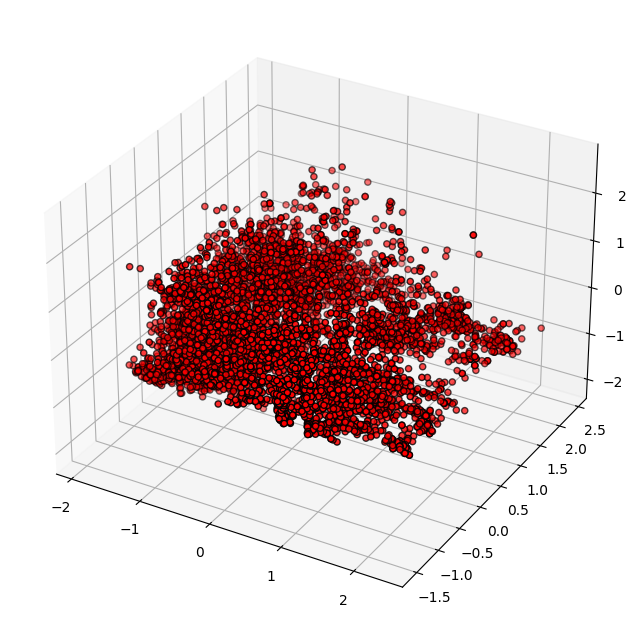

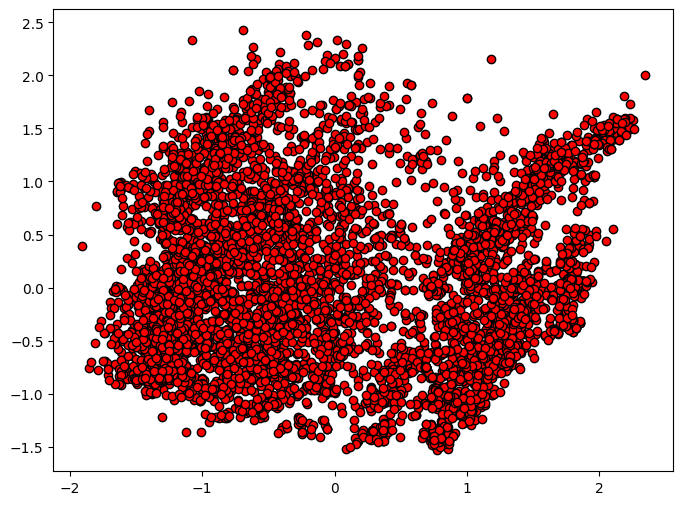

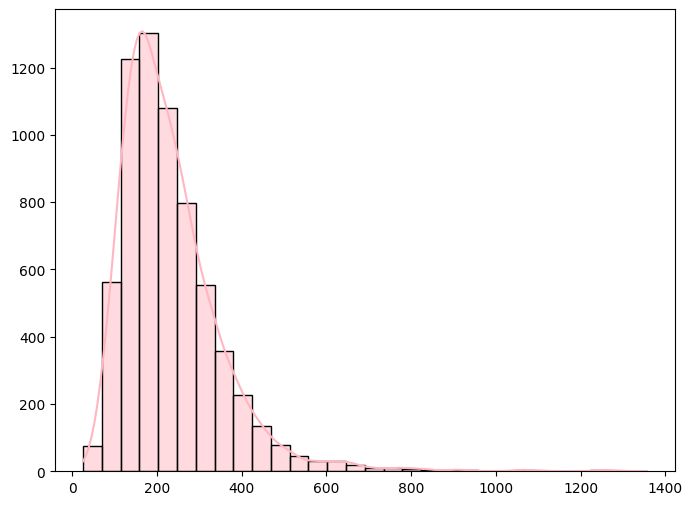

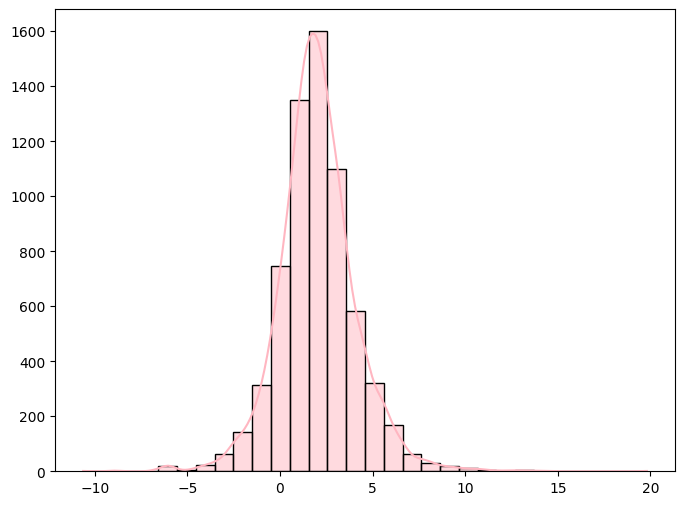

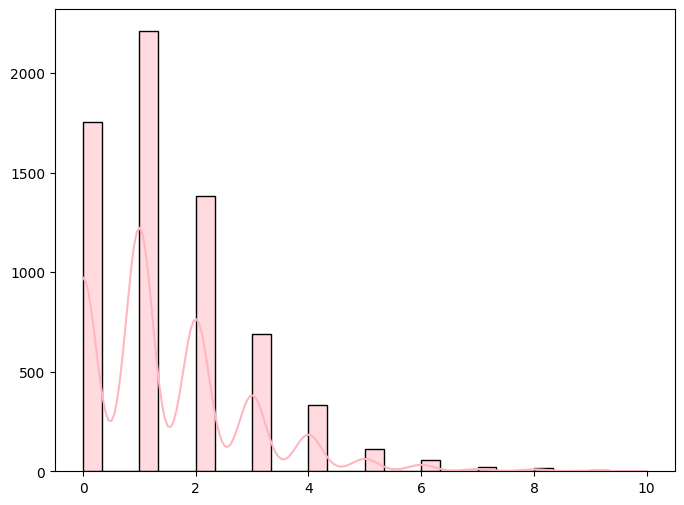

In [5]:
df = calculate_metrics(pubchem)
plot_3D_pca(df,"Morgan", "pubchem_morgan_3d.png")
plot_2D_pca(df,"Morgan", "pubchem_morgan_2d.png")

plot_distribution(df,"Molecular Weight","pubchem_molwt.png")
plot_distribution(df,"LogP","pubchem_logp.png")
plot_distribution(df,"Cycles","pubchem_cycles.png")